### Credit: Team Leader (@ Fauzan Ihza Fajar)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train = pd.read_csv('/kaggle/input/ristek-datathon-2023/train.csv')
test = pd.read_csv('/kaggle/input/ristek-datathon-2023/test.csv')

In [3]:
train

,waktu_setempat,id_jalan,id_titik_mulai,id_titik_akhir,rerata_kecepatan
0,2020-02-01 01:00:00+00:00,691007296,21390008,1425033102,29.126
1,2020-02-01 01:00:00+00:00,47010584,1677092762,579493410,46.576
2,2020-02-01 01:00:00+00:00,22932408,26486694,1930267566,36.587
3,2020-02-01 01:00:00+00:00,142479648,1111592522,3775231113,34.063
4,2020-02-01 01:00:00+00:00,8504977,5940503398,5940503394,38.336
...,...,...,...,...,...
398643,2020-02-22 23:00:00+00:00,3691841,18235127,1590448416,41.094
398644,2020-02-22 23:00:00+00:00,3691841,1250564256,18293380,45.902
398645,2020-02-22 23:00:00+00:00,182210371,33139383,33139375,38.918
398646,2020-02-22 23:00:00+00:00,8504977,1623682036,26467191,34.951


In [4]:
train['id_jalan'][:100000]

0        691007296
1         47010584
2         22932408
3        142479648
4          8504977
           ...    
99995     66924592
99996      3688059
99997         1210
99998    182210371
99999      3688059
Name: id_jalan, Length: 100000, dtype: int64

In [ ]:
import requests
from bs4 import BeautifulSoup

def scrape_osm_data(id_jalan):
    base_url = f"https://www.openstreetmap.org/?way={id_jalan}"
    
    response = requests.get(base_url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")
        th_elements = soup.find_all("th", class_='browse-tag-k')
        td_elements = soup.find_all("td", class_='browse-tag-v')
        
        data_dict = {}
        
        for th, td in zip(th_elements, td_elements):
            key = th.get_text(strip=True)
            value = td.get_text(strip=True)
            data_dict[key] = value
        
        return data_dict
    else:
        return None

if __name__ == "__main__":
    id_jalan_list = train['id_jalan'][:100000]  # Ganti dengan ID jalan yang sesuai
    
    scraped_data = []
    for id_jalan in id_jalan_list:
        data = scrape_osm_data(id_jalan)
        if data:
            scraped_data.append(data)
            print(f"Data untuk ID Jalan {id_jalan}: {data}")
        else:
            print(f"Tidak dapat mengakses data untuk ID Jalan {id_jalan}")
    
    # Membuat DataFrame dari data yang diambil
    df = pd.DataFrame(scraped_data)
# Ganti nama kolom sesuai kebutuhan

Data untuk ID Jalan 691007296: {'cycleway': 'lane', 'highway': 'trunk', 'lanes': '3', 'lanes:forward': '2', 'lit': 'yes', 'maxspeed': '30 mph', 'name': 'Upper Tooting Road', 'operator': 'Transport for London', 'ref': 'A24', 'sidewalk': 'separate', 'surface': 'asphalt', 'turn:lanes:forward': 'left;through|through;right'}
Data untuk ID Jalan 47010584: {'highway': 'primary', 'lit': 'yes', 'maxspeed': '30 mph', 'name': 'High Road', 'ref': 'A1000'}
Data untuk ID Jalan 22932408: {'highway': 'secondary', 'lit': 'yes', 'maxspeed': '20 mph', 'name': 'Nightingale Lane', 'ref': 'B237', 'ref:GB:usrn': '22903508', 'source:maxspeed': 'The Wandsworth (20mph Speed Limit) (No. 1) Experimental Order 2020', 'source:name': 'photograph', 'wikidata': 'Q67972812'}
Data untuk ID Jalan 142479648: {'cycleway:left': 'share_busway', 'highway': 'primary', 'lanes': '3', 'lanes:backward': '2', 'lanes:forward': '1', 'lit': 'yes', 'maxspeed': '20 mph', 'name': 'Lavender Hill', 'ref': 'A3036', 'ref:GB:usrn': '22902838'

In [46]:
df

,cycleway,highway,lanes,lanes:forward,lit,maxspeed,name,operator,ref,sidewalk,surface,turn:lanes:forward,ref:GB:usrn,source:maxspeed,source:name,wikidata
0,lane,trunk,3,2,yes,30 mph,Upper Tooting Road,Transport for London,A24,separate,asphalt,left;through|through;right,NaN,NaN,NaN,NaN
1,NaN,primary,NaN,NaN,yes,30 mph,High Road,NaN,A1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,secondary,NaN,NaN,yes,20 mph,Nightingale Lane,NaN,B237,NaN,NaN,NaN,22903508,The Wandsworth (20mph Speed Limit) (No. 1) Exp...,photograph,Q67972812


In [56]:
train['waktu_setempat'] = pd.to_datetime(train['waktu_setempat'])
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398648 entries, 0 to 398647
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype              
---  ------            --------------   -----              
 0   waktu_setempat    398648 non-null  datetime64[ns, UTC]
 1   id_jalan          398648 non-null  int64              
 2   id_titik_mulai    398648 non-null  int64              
 3   id_titik_akhir    398648 non-null  int64              
 4   rerata_kecepatan  398648 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(1), int64(3)
memory usage: 15.2 MB


In [57]:
# train = train.drop(columns=['waktu_setempat'])
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.rerata_kecepatan.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['rerata_kecepatan'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (526137, 5)


In [58]:
all_data['waktu_setempat'] = pd.to_datetime(all_data['waktu_setempat'])
all_data['hari_minggu'] = all_data['waktu_setempat'].dt.day_of_week
all_data['jam'] = all_data['waktu_setempat'].dt.hour

# Definisikan fungsi untuk mengelompokkan waktu
def categorize_time_of_day(hour):
    if 5 <= hour < 12:
        return 1
    elif 12 <= hour < 18:
        return 2
    elif 18 <= hour < 22:
        return 3
    else:
        return 4

# Tambahkan kolom kategori waktu
all_data['waktu'] = all_data['waktu_setempat'].dt.hour.apply(categorize_time_of_day)

# Definisikan fungsi untuk mengelompokkan akhir pekan atau bukan
def categorize_weekend(day):
    if day.day_of_week < 5:  # 0-4 adalah Senin-Jumat
        return 1
    else:
        return 0

# Tambahkan kolom kategori akhir pekan
all_data['weekend'] = all_data['waktu_setempat'].apply(categorize_weekend)
all_data

,waktu_setempat,id_jalan,id_titik_mulai,id_titik_akhir,id,hari_minggu,jam,waktu,weekend
0,2020-02-01 01:00:00+00:00,691007296,21390008,1425033102,NaN,5,1,4,0
1,2020-02-01 01:00:00+00:00,47010584,1677092762,579493410,NaN,5,1,4,0
2,2020-02-01 01:00:00+00:00,22932408,26486694,1930267566,NaN,5,1,4,0
3,2020-02-01 01:00:00+00:00,142479648,1111592522,3775231113,NaN,5,1,4,0
4,2020-02-01 01:00:00+00:00,8504977,5940503398,5940503394,NaN,5,1,4,0
...,...,...,...,...,...,...,...,...,...
526132,2020-02-29 23:00:00+00:00,8504977,2378878,4712485405,127484.0,5,23,4,0
526133,2020-02-29 23:00:00+00:00,26785612,265111477,106201,127485.0,5,23,4,0
526134,2020-02-29 23:00:00+00:00,47010584,196038,1677146686,127486.0,5,23,4,0
526135,2020-02-29 23:00:00+00:00,22932408,873733547,1692210206,127487.0,5,23,4,0


In [59]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [17]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import RobustScaler
rfc = RandomForestRegressor()
rfc_pipeline = make_pipeline(RobustScaler(),rfc)

In [60]:
X, y = train.drop(columns=['waktu_setempat','id']), y_train
print(X.shape)
print(y.shape)

(398648, 7)
(398648,)


In [17]:
numeric_feats = X.dtypes[X.dtypes != "datetime64[ns, UTC]"].index

# Check the skew of all numerical features
skewed_feats = X[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    X[feat] = boxcox1p(X[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])
numeric_feats = X.dtypes[X.dtypes != "datetime64[ns, UTC]"].index

# Check the skew of all numerical features
skewed_feats = X[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)



Skew in numerical features: 



,Skew
id_jalan,3.243497
id_titik_mulai,1.666087
id_titik_akhir,1.665520
jam,-0.159751
hari_minggu,-0.225359


In [61]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [72]:
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.metrics import make_scorer

def smape(actual, predicted):
    absolute_errors = np.abs(predicted - actual)
    scaled_errors = 2 * absolute_errors / (np.abs(predicted) + np.abs(actual))
    return np.mean(scaled_errors) * 100

# Buat scorer khusus untuk sMAPE
smape_scorer = make_scorer(smape, greater_is_better=False)
# KFold= KFold(n_splits=5, shuffle=True, random_state=42)
# scores = cross_val_score(RandomForestRegressor(), X, y, cv=KFold, scoring=smape_scorer)

# mean_smape = -np.mean(scores)  # Karena scorer digunakan adalah greater_is_better=False
# print(f"Mean sMAPE: {mean_smape:.2f}")

In [37]:
scores = cross_val_score(XGBRegressor(), X, y, cv=KFold, scoring=smape_scorer)

mean_smape = -np.mean(scores)  # Karena scorer digunakan adalah greater_is_better=False
print(f"Mean sMAPE: {mean_smape:.2f}")

Mean sMAPE: 9.09


In [39]:
model = XGBRegressor()
model.fit(X,y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [26]:
scores = cross_val_score(DecisionTreeRegressor(), X, y, cv=KFold, scoring=smape_scorer)

mean_smape = -np.mean(scores)  # Karena scorer digunakan adalah greater_is_better=False
print(f"Mean sMAPE: {mean_smape:.2f}")

Mean sMAPE: 10.34


In [27]:
scores = cross_val_score(GradientBoostingRegressor(), X, y, cv=KFold, scoring=smape_scorer)

mean_smape = -np.mean(scores)  # Karena scorer digunakan adalah greater_is_better=False
print(f"Mean sMAPE: {mean_smape:.2f}")

Mean sMAPE: 13.11


In [62]:
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression,LinearRegression,RidgeCV, LassoCV
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, GridSearchCV, cross_val_score, RandomizedSearchCV

# Model assignment
dtc = DecisionTreeRegressor()
rfc = RandomForestRegressor()
abc = AdaBoostRegressor()
etc = ExtraTreesRegressor() 
gbc = GradientBoostingRegressor()
bgc = BaggingRegressor()
knn = KNeighborsRegressor() 
svr = SVR()
xgb = XGBRegressor(eval_metric='error')
mlp = MLPRegressor()
lr = LinearRegression()

# Assign model to a list
models = [dtc, rfc, abc, etc, gbc, bgc, knn, svr, xgb, mlp,lr]

model_name = []

# Get Classifier names for every model
for name in models:
    names = str(type(name)).split('.')[-1][:-2]
    # Append classifier names to model_name list
    model_name.append(names)

In [7]:
submit = pd.read_csv('/kaggle/input/ristek-datathon-2023/sample_submission.csv')

In [71]:
X

,id_jalan,id_titik_mulai,id_titik_akhir,hari_minggu,jam,waktu,weekend
0,691007296,21390008,1425033102,5,1,4,0
1,47010584,1677092762,579493410,5,1,4,0
2,22932408,26486694,1930267566,5,1,4,0
3,142479648,1111592522,3775231113,5,1,4,0
4,8504977,5940503398,5940503394,5,1,4,0
...,...,...,...,...,...,...,...
398643,3691841,18235127,1590448416,5,23,4,0
398644,3691841,1250564256,18293380,5,23,4,0
398645,182210371,33139383,33139375,5,23,4,0
398646,8504977,1623682036,26467191,5,23,4,0


In [67]:
# Calculate mutual information
from sklearn.feature_selection import mutual_info_regression

mi_scores = mutual_info_regression(X, y)

# Print the mutual information scores for each feature
for i, mi in enumerate(mi_scores):
    print(f"Feature {i}: {mi:.4f}")

Feature 0: 0.0205
Feature 1: 0.0053
Feature 2: 0.0109
Feature 3: 0.0034
Feature 4: 0.1188
Feature 5: 0.0883
Feature 6: 0.0044


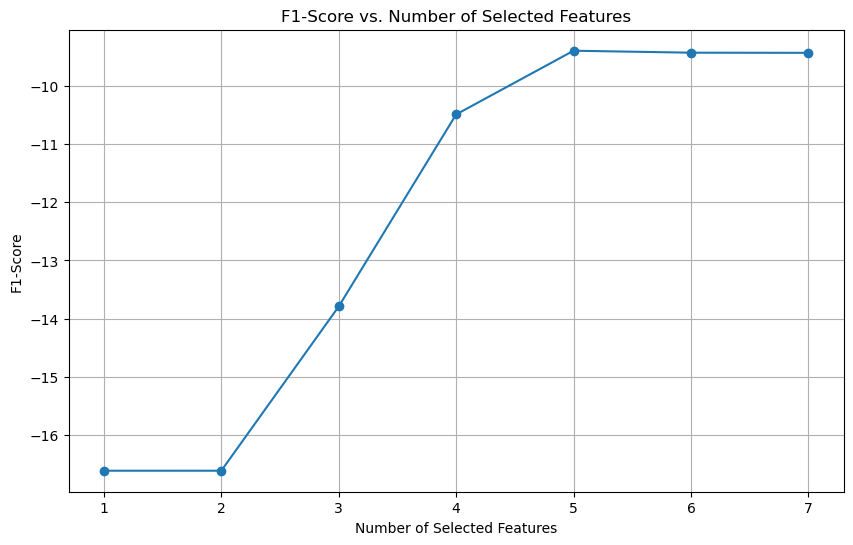

In [73]:
skfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Define a range of k values (number of selected features)
k_values = range(1, len(X.columns) + 1)

# Initialize lists to store F1-scores for each k value
smape_hasil = []

for k in k_values:
    # Calculate mutual information scores for features
    mutual_info = mutual_info_regression(X, y,discrete_features='auto')

    # Sort features by mutual information score
    sorted_features = sorted(zip(mutual_info, X.columns), reverse=True)

    # Select the top k features based on mutual information
    selected_features = [feature for score, feature in sorted_features[:k]]

    # Select only the top k features
    X_train_selected = X[selected_features]

    # Train a classifier (e.g., Logistic Regression) on the selected features
    # Replace with your chosen classifier
    smape= cross_val_score(rfc, X_train_selected, y, scoring=smape_scorer, cv = skfold)
    smape = smape.mean()
    smape_hasil.append(smape)

# Plot the F1-score performance for different numbers of selected features
plt.figure(figsize=(10, 6))
plt.plot(k_values, smape_hasil, marker='o')
plt.title("F1-Score vs. Number of Selected Features")
plt.xlabel("Number of Selected Features")
plt.ylabel("F1-Score")
plt.grid(True)
plt.show()

In [74]:
smape_hasil

[-16.61240015379459,
 -16.612699769065745,
 -13.790516575115252,
 -10.490578070902666,
 -9.39602112450622,
 -9.429827736750102,
 -9.432194713497235]

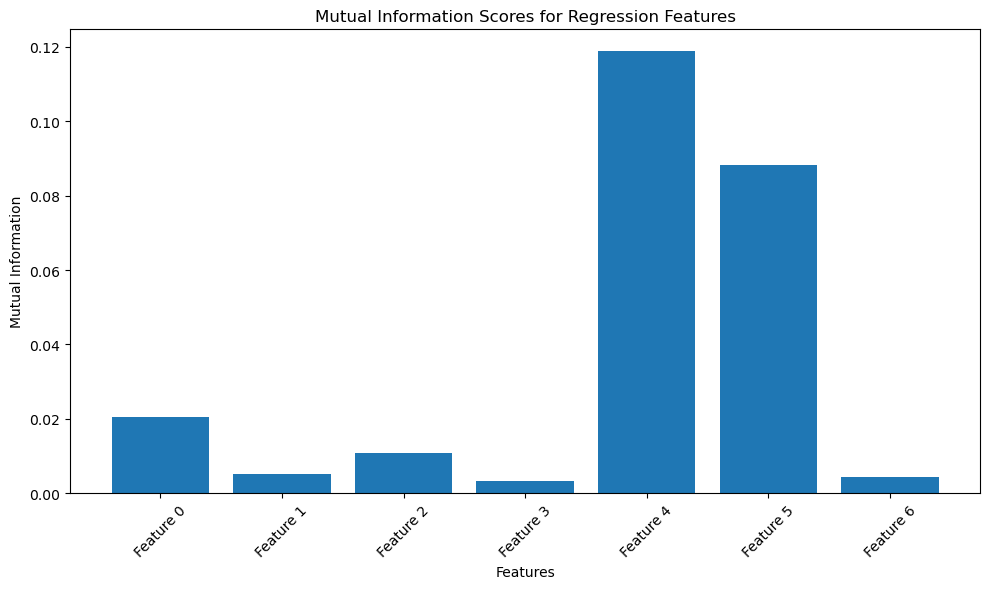

In [69]:
# Plotting the mutual information scores
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(range(len(mi_scores)), mi_scores, tick_label=[f'Feature {i}' for i in range(len(mi_scores))])
plt.xlabel('Features')
plt.ylabel('Mutual Information')
plt.title('Mutual Information Scores for Regression Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [63]:
test = test.drop(columns=['waktu_setempat','id'])

In [64]:
model = RandomForestRegressor()
model.fit(X,y)

RandomForestRegressor()

In [77]:
xgb.fit(X,y)
xgb2_pred = xgb.predict(X)

In [79]:
def smape(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))
print(smape(y_train, xgb_train_pred*0.5+xgb2_pred*0.5))

7.552317814852255


In [82]:
rfc_pred = model.predict(test)
xgb_pred = xgb.predict(test)

In [83]:
ensemble = rfc_pred*0.5+xgb_pred*0.5

In [65]:
xgb_train_pred = model.predict(X)
xgb_pred = model.predict(test)
print(smape(y_train, xgb_train_pred))

6.868474564025889


In [84]:
submission = pd.read_csv('/kaggle/input/ristek-datathon-2023/sample_submission.csv')
submission['rerata_kecepatan'] = ensemble
submission.to_csv('submission_ensemble1.csv',index=False)
submission

,id,rerata_kecepatan
0,0,42.772238
1,1,39.272446
2,2,35.957778
3,3,41.295550
4,4,29.387151
...,...,...
127484,127484,32.629376
127485,127485,36.556046
127486,127486,42.216048
127487,127487,32.430823
